In [13]:
import requests
import json
import seaborn as sns
import matplotlib
import openweathermapy.core as ow
from citipy import citipy
import pandas as pd
import random as rd
from pw_config import api_key
import pprint as pp
import time
import urllib
import csv
import matplotlib.pyplot as plt

In [14]:
url_city="http://openweathermap.org/help/city_list.txt"
city = pd.read_csv("city_list.txt", delimiter="	")
city.columns=['id','city','lat','lon','countryCode']
type(city["city"]) #74071 rows

#Select >500 cities as a sample because it's possible weather is not found
city_random=rd.sample(set(city["city"]),520)

In [15]:
'''Get the following data for the 500 cities
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
'''
settings = {"units": "imperial", "appid": api_key}
city_500=city_random[0:500]
temp=[]
lat=[]
humidity=[]
cloudiness=[]
wind_speed=[]

count=1

#create log file with heading
csvfile=open("log.csv", 'w+') 
csvwriter = csv.writer(csvfile, delimiter=',')
csvwriter.writerow(['City Number', 'City Name', 'Requested URL'])
for city in city_random:
#For the time limit
#     if count % 60 ==0:
#         print(time.time()-start_time)
#         time.sleep(10)
#         pass
    if count ==501:
        break
    else:
        try:
            start_time = time.time()
            curr_weather= ow.get_current(city,
                                        units="imperial",
                                        appid=api_key)
            temp.append(curr_weather["main"]["temp"])
            lat.append(curr_weather["coord"]["lat"])
            humidity.append(curr_weather["main"]["humidity"])
            cloudiness.append(curr_weather["clouds"]["all"])
            wind_speed.append(curr_weather["wind"]["speed"])
            #open log file again and put in the values
            #Not able to print the key value in excel because it's sensitive info.
            csvwriter.writerow([count, city, 'http://api.openweathermap.org/data/2.5/weather?'])
            
            count +=1
        except urllib.error.HTTPError as e:
            pass
        except NameError as e:
            pass
csvfile.close() 
print(f"It's done")

It's done


500


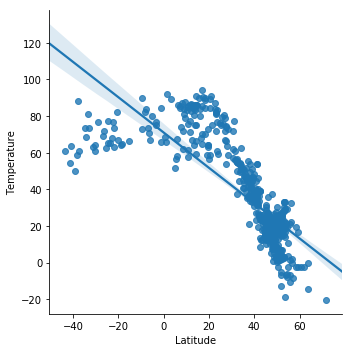

In [16]:
#Create table for plots

d={"city":city_500,"Latitude":lat,"Temperature":temp,"Humidity":humidity, 
   "Cloudiness":cloudiness,"Wind Speed":wind_speed}
df=pd.DataFrame(data=d)
df.set_index("city")
print(len(city_500))
df.head()

sns.lmplot("Latitude", "Temperature", data=df, fit_reg=True)

# print(len(city_500))
# print(len(temp))
# print(len(lat))
# print(len(humidity))
# print(len(cloudiness))
# print(len(wind_speed))


Text(0,0.5,'Temperature')

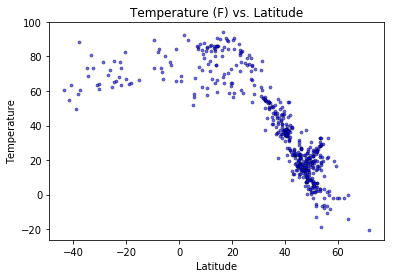

In [17]:
#Create scatter plots
'''
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude'''

colors = ['lightcoral', 'gold', 'lightskyblue']

#Plot 1:Temperature (F) vs. Latitude
plot1=plt.scatter(df["Latitude"], df["Temperature"],
                  s=10, marker="o", facecolors="blue", alpha=0.6, edgecolor="black",linewidths=0.5)
plt.title("Temperature (F) vs. Latitude 02/26/18")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


Text(0,0.5,'Humidity')

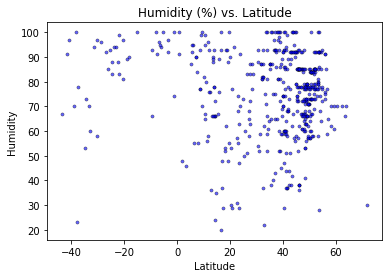

In [18]:
#Plot 2:Humidity (%) vs. Latitude
plot1=plt.scatter(df["Latitude"], df["Humidity"],
                  s=10, marker="o", facecolors="blue", alpha=0.6, edgecolor="black",linewidths=0.5)
plt.title("Humidity (%) vs. Latitude 02/26/18")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


Text(0,0.5,'Cloudiness')

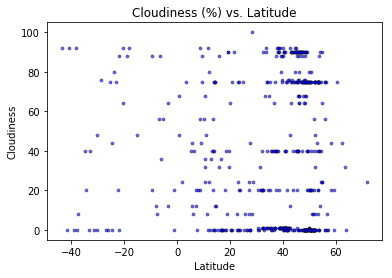

In [19]:
#Plot 3:Cloudiness (%) vs. Latitude
plot1=plt.scatter(df["Latitude"], df["Cloudiness"],
                  s=10, marker="o", facecolors="blue", alpha=0.6, edgecolor="black",linewidths=0.5)
plt.title("Cloudiness (%) vs. Latitude 02/26/18")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

Text(0,0.5,'Wind Speed')

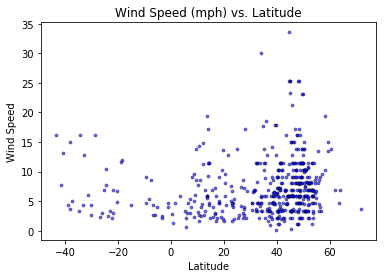

In [20]:
#Plot 2:Wind Speed (mph) vs. Latitude
plot1=plt.scatter(df["Latitude"], df["Wind Speed"],
                  s=10, marker="o", facecolors="blue", alpha=0.6, edgecolor="black",linewidths=0.5)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [21]:
#three observable trends

'''
1. The relationship between temperature and latitude is surprisingly not linear. 
    It makes sense that as the latitude increase, the temperature drops because it's 
    away from the equator.
2. There is not a strong relationship between Cloudiness and Latitude. Although 
    more dots are on the positive side of the latitude range. This should be half half.
    The cloudiness plot shows that the clouds are evenly fluffed, not depending on 
    latitude, which makes sense.
3. Wind speed does not seem to have a strong relationship with the Latitude. One observation
   is that in most of the cities, the wind speed is between 0 and 15mph.
'''

"\n1. The relationship between temperature and latitude is surprisingly not linear. \n    It makes sense that as the latitude increase, the temperature drops because it's \n    away from the equator.\n2. There is not a strong relationship between Cloudiness and Latitude. Although \n    more dots are on the positive side of the latitude range. This should be half half.\n    The cloudiness plot shows that the clouds are evenly fluffed, not depending on \n    latitude, which makes sense.\n3. Wind speed does not seem to have a strong relationship with the Latitude. One observation\n   is that in most of the cities, the wind speed is between 0 and 15mph.\n"